# Phase-averaged and phase-resolved spectroscopy

## Loading data and observation, setting pathes

1. Import the necessary packages.

In [1]:
import pandas as pd
import sys
sys.path.append('../../')
from nustar_scripts.nu_class import np, plt, os, glob, NustarObservation, scan_phase_resolved_products
from nustar_scripts.pulsar_init import Nu_path, ObsList
from nustar_scripts.nu_pyxspec import Model, Xset, AllModels,  AllModels, xspec,fit_spectra, scan_containers_ph_res,  plot_ph_res_storage

import matplotlib
%matplotlib inline
pd.set_option('display.max_columns', 500)

2. Set `ObsID` and `NustarObservation` object.

In [2]:
ObsID = ObsList[2] 
nu_obs = NustarObservation(ObsID, nu_path=Nu_path)
ph_ave_folder = nu_obs.products_path+'/spe_and_lc'
ph_res_folder = nu_obs.products_path+'/phase_resolved'

###
Observation 90302319006 loaded successfully


3. Set xspec settings/models

In [3]:
model_name = 'relxilllp-free-pars'  #set the model name
AllModels.lmod('relxill', '/Users/sdbykov/work/xray_pulsars/sj0243_nu/python_for_nustar/relxill_model/') #set path to relxill model
calc_errors = False #whether to calculate errors on spectral parameters.  useful to turn off when doing a quick fit.

AllModels.clear()
Xset.parallel.error = 22


## Phase-averaged spectra

1. Run cell below to set up an xspec model. Adjust its parameters to your needs and run `fit_spectra` function in the next cell.

The spectral results will be saved in the `xspec/{model name}/` folder in the `out{ObsID}/products/phase_resolved/` directory.

In [4]:
os.chdir(ph_ave_folder)

model = Model("constant*phabs*(bbodyrad+relxilllp)")
model.phabs.nH = '0.8 -1'

model.bbodyrad.kT = '1'
model.bbodyrad.norm = '1e3' # ,, 0.1, 0.2, 3, 4'

model.relxilllp.h = '5 -1'
model.relxilllp.a = '0 -1'
model.relxilllp.Incl = '15'
model.relxilllp.Incl.frozen = False
model.relxilllp.Rin = '70 0.1, 0, 0, 900, 900'
model.relxilllp.Rout = '=1.1*p8'
model.relxilllp.z = '0 -1'
model.relxilllp.gamma = '1.2  0.005 0.3 0.3 3 3'
model.relxilllp.logxi = '4'
model.relxilllp.Ecut = '20'
model.relxilllp.Ecut.frozen = False
model.relxilllp.refl_frac = '0.3'
model.relxilllp.fixReflFrac = '0'
model.relxilllp.Afe = '5 -1'



deleted xspec/relxilllp-free-pars/*90302319006_relxilllp-free-pars* and xspec/relxilllp-free-pars/xcm/*90302319006_relxilllp-free-pars* files
no storage found. fitting...
 loaded spe_and_lcA_sr.pi and spe_and_lcB_sr.pi from /Users/sdbykov/work/xray_pulsars/nustar_sj0243/nustar_products/out90302319006/products/spe_and_lc
fitting done
skip errors
Fit done;  chi2 = 2290.505718724024 for 2170 dof, chi2_red = 1.0555325892737437, H0 prob = 0.03542196515
<Storage with 2 containers>


,N,srcID,comp,par,ipar,val,error_l,error_u,er_status,sigma,frozen,link
0,0,90302319006_relxilllp-free-pars_FPMA,constant,factor,1,1.000000,0.0,0.0,FFFFFFFFF,0.000000,True,
1,0,90302319006_relxilllp-free-pars_FPMA,phabs,nH,2,0.800000,0.0,0.0,FFFFFFFFF,0.000000,True,
2,0,90302319006_relxilllp-free-pars_FPMA,bbodyrad,kT,3,1.438817,0.0,0.0,FFFFFFFFF,0.012825,False,
3,0,90302319006_relxilllp-free-pars_FPMA,bbodyrad,norm,4,612.211500,0.0,0.0,FFFFFFFFF,50.617903,False,
4,0,90302319006_relxilllp-free-pars_FPMA,relxilllp,h,5,5.000000,0.0,0.0,FFFFFFFFF,0.000000,True,
5,0,90302319006_relxilllp-free-pars_FPMA,relxilllp,a,6,0.000000,0.0,0.0,FFFFFFFFF,0.000000,True,
6,0,90302319006_relxilllp-free-pars_FPMA,relxilllp,Incl,7,10.432533,0.0,0.0,FFFFFFFFF,2.262436,False,
7,0,90302319006_relxilllp-free-pars_FPMA,relxilllp,Rin,8,52.628644,0.0,0.0,FFFFFFFFF,3.508120,False,
8,0,90302319006_relxilllp-free-pars_FPMA,relxilllp,Rout,9,57.891508,0.0,0.0,FFFFFFFFF,0.000000,False,= 1.1*p8
9,0,90302319006_relxilllp-free-pars_FPMA,relxilllp,z,10,0.000000,0.0,0.0,FFFFFFFFF,0.000000,True,


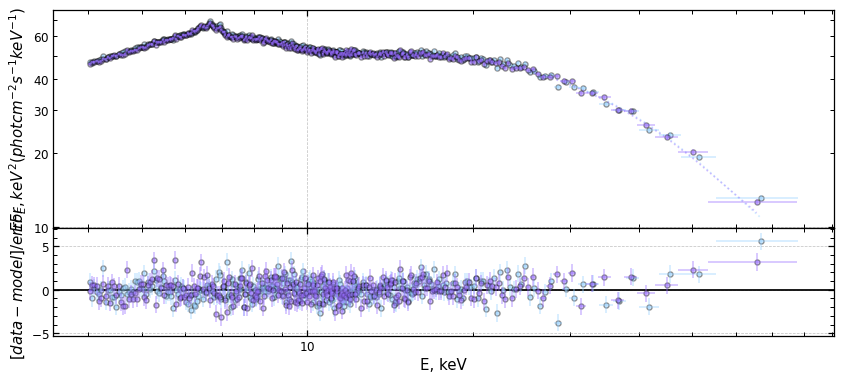

In [5]:

mo_fid_pars = fit_spectra(model = model, model_name = model_name, prefix = ObsID, dataset='spe_and_lc', rewrite = True, calc_errors = calc_errors)
mo_fid_pars

## Phase-resolved spectra

1.  Set the model for the phase-resolved spectra in bins.  Usially it is the same model as for phase-averaged spectra, but with some parameters frozen.

In [6]:
os.chdir(ph_res_folder)

In [7]:
#try to restore the model for phase-average spectra
xspec.Xset.restore(f'{ph_ave_folder}/xspec/{model_name}/xcm/{ObsID}_{model_name}.xcm_model')

#free some of its parameters to phase-averaged values
model = AllModels(1)
model.bbodyrad.kT.frozen = False
model.bbodyrad.norm.frozen = False
model.relxilllp.logxi.frozen = False
model.relxilllp.Rin.frozen = True
model.relxilllp.Incl.frozen = True


2. Run the cell to iterate over phase bins and fit the spectra.

##################### bin number 1 #####################
deleted xspec/relxilllp-free-pars/*90302319006_bin1_relxilllp-free-pars* and xspec/relxilllp-free-pars/xcm/*90302319006_bin1_relxilllp-free-pars* files
no storage found. fitting...
 loaded phase_resolved_bin1A_sr.pi and phase_resolved_bin1B_sr.pi from /Users/sdbykov/work/xray_pulsars/nustar_sj0243/nustar_products/out90302319006/products/phase_resolved
fitting done
skip errors
Fit done;  chi2 = 1329.1769537359946 for 1341 dof, chi2_red = 0.9911834106905254, H0 prob = 0.5855405663
<Storage with 2 containers>
##################### bin number 2 #####################
deleted xspec/relxilllp-free-pars/*90302319006_bin2_relxilllp-free-pars* and xspec/relxilllp-free-pars/xcm/*90302319006_bin2_relxilllp-free-pars* files
no storage found. fitting...
 loaded phase_resolved_bin2A_sr.pi and phase_resolved_bin2B_sr.pi from /Users/sdbykov/work/xray_pulsars/nustar_sj0243/nustar_products/out90302319006/products/phase_resolved
fitting done
skip er

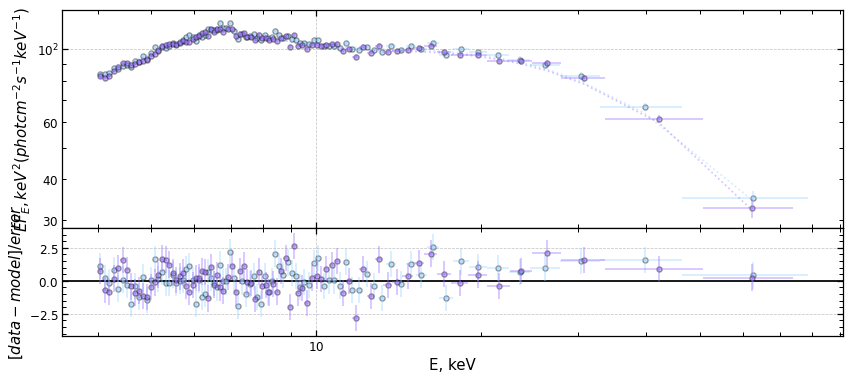

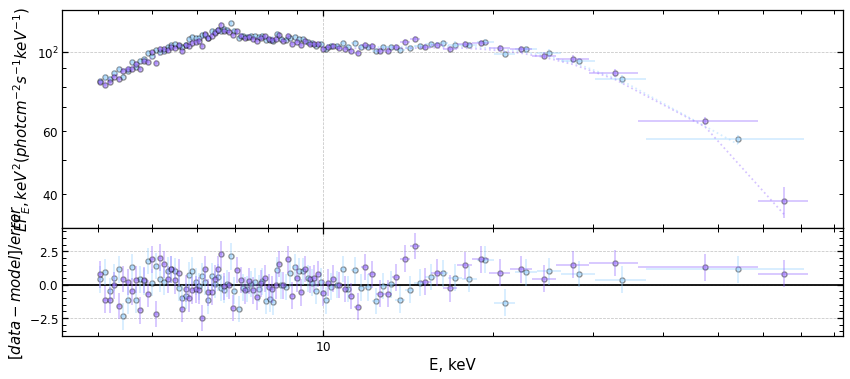

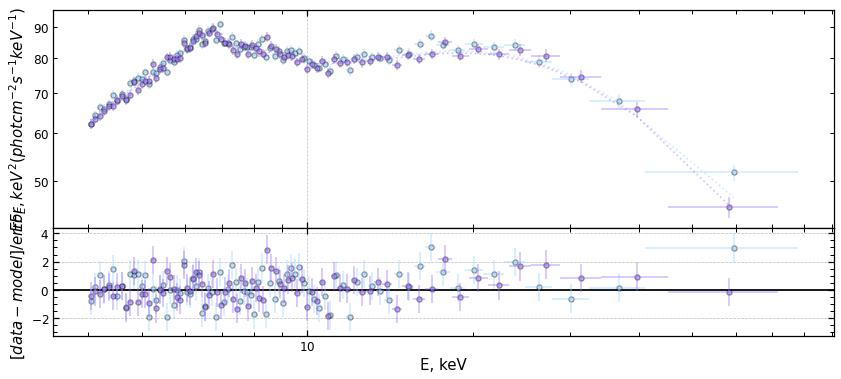

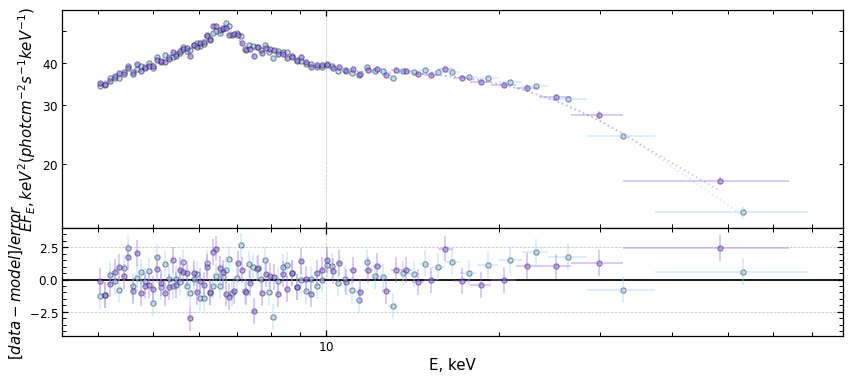

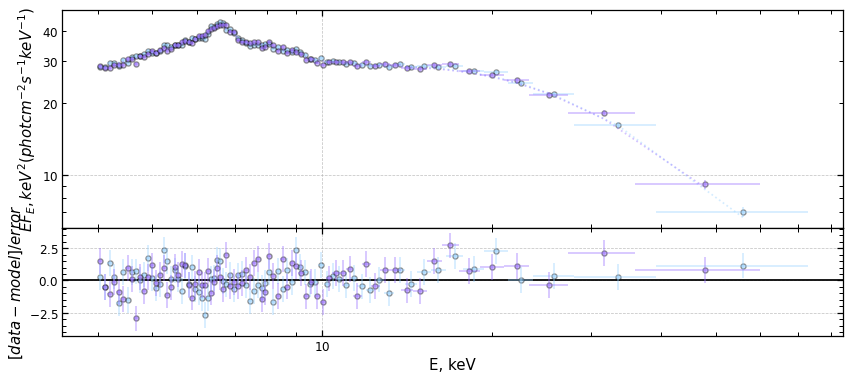

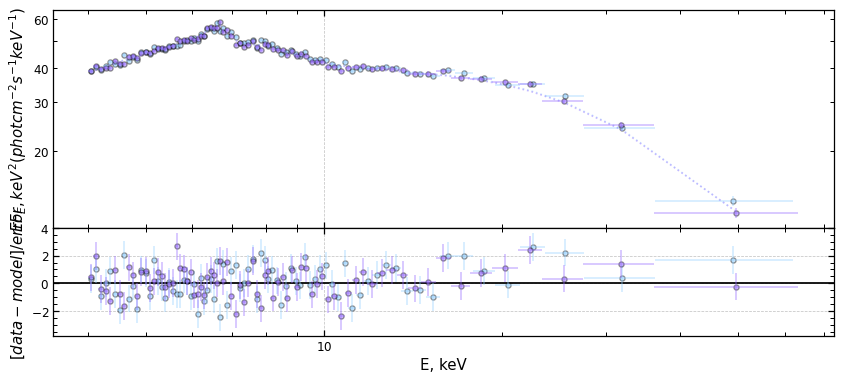

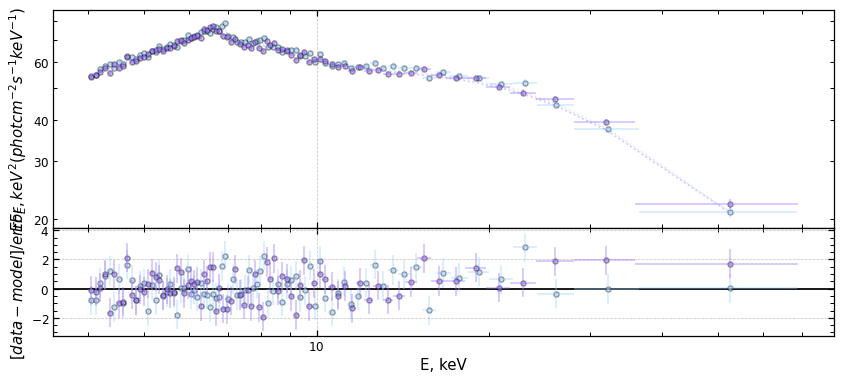

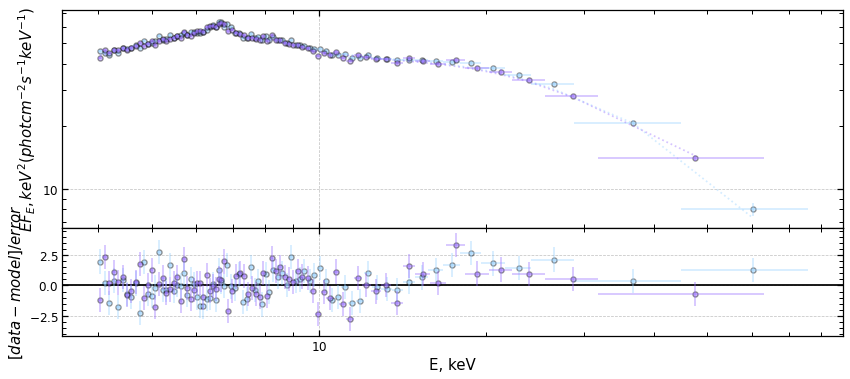

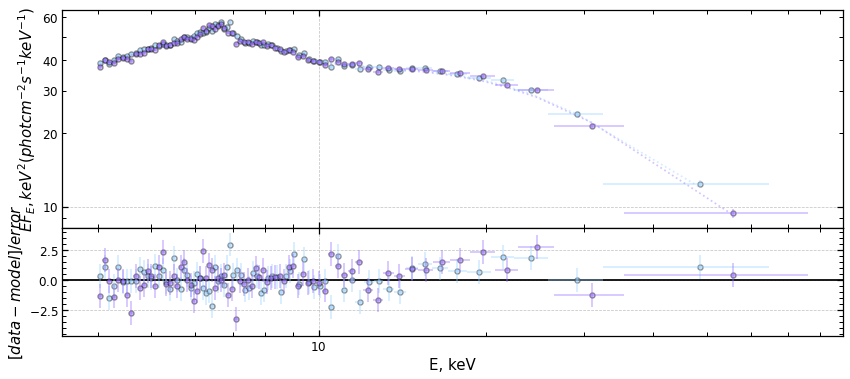

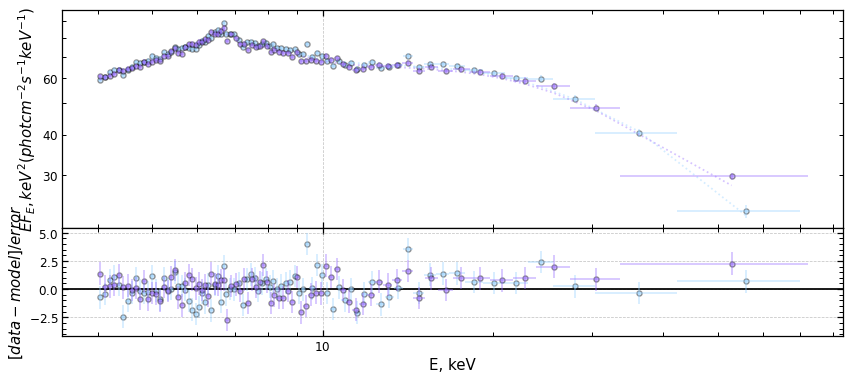

In [8]:
for binnum in range(1,11):
    print(f'##################### bin number {binnum} #####################')
    binnum = str(binnum)
    bb_pars = fit_spectra(model = model, model_name = model_name, prefix = f'{ObsID}_bin{binnum}', dataset=f'phase_resolved_bin{binnum}', rewrite = True, calc_errors=calc_errors)


## Plot  phase-resolved results

1. Run the following cells to plot the results.

In [12]:
df_ph_res = scan_containers_ph_res(model_name)
df_ph_res

error_l  error_u  frozen       val
comp      par phase                                    
bbodyrad  kT  0.05       0.0      0.0     0.0  1.527794
              0.15       0.0      0.0     0.0  1.482020
              0.25       0.0      0.0     0.0  1.513540
              0.35       0.0      0.0     0.0  1.688452
              0.45       0.0      0.0     0.0  1.483716
...                      ...      ...     ...       ...
relxilllp z   0.55       0.0      0.0     1.0  0.000000
              0.65       0.0      0.0     1.0  0.000000
              0.75       0.0      0.0     1.0  0.000000
              0.85       0.0      0.0     1.0  0.000000
              0.95       0.0      0.0     1.0  0.000000

[150 rows x 4 columns]

In [13]:
df_ph_res.loc[pd.IndexSlice['relxilllp','refl_frac',:]]

,error_l,error_u,frozen,val
phase,,,,
0.05,0.0,0.0,0.0,0.190243
0.15,0.0,0.0,0.0,0.182506
0.25,0.0,0.0,0.0,0.214763
0.35,0.0,0.0,0.0,0.402240
0.45,0.0,0.0,0.0,0.484638
0.55,0.0,0.0,0.0,0.321676
0.65,0.0,0.0,0.0,0.199175
0.75,0.0,0.0,0.0,0.312975
0.85,0.0,0.0,0.0,0.451683


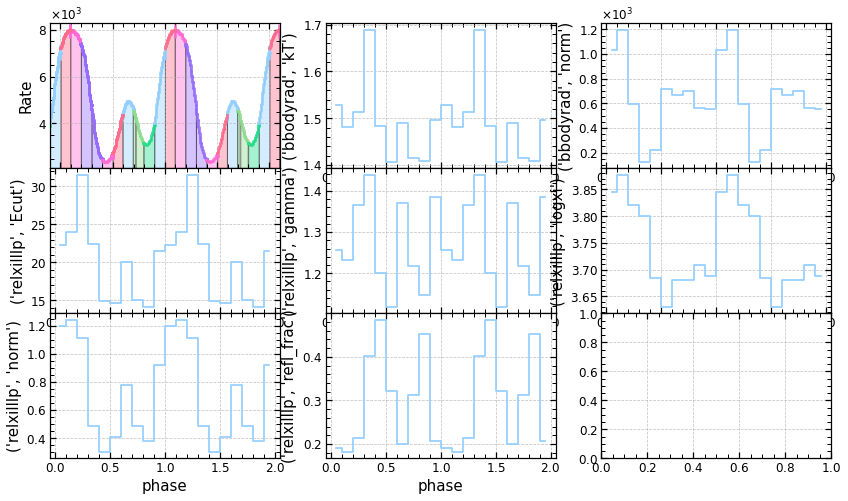

In [14]:
os.chdir(ph_res_folder)
plot_ph_res_storage(df_ph_res, nu_obs, 'phase_resolved');


With `df_ph_res` data frame and functions used above  you can visualize the results and creates plots and tables.